In [2]:
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
import time

# Auxiliares
def lam(t):
    if 0 <= t < 3:
        return 5 + 5*t
    elif 3 <= t <= 5:
        return 20
    elif 5 < t <= 9:
        return 30 - 2*t

def plot_imp(proc):
    t, evs = proc()

    print(f'Total de eventos: {t}')

    for ev in evs:
        plt.plot([ev,ev],[20,0])

    plt.yticks(np.arange(0,20,1))
    plt.xticks(np.arange(0,10,1))
    
    fig = plt.gcf()
    fig.set_size_inches(15,6)
    plt.show()

def get_probs(g, nsim, *args):
    acc = []

    start = time.perf_counter()
    for _ in range(nsim):
        r = g(*args)
        acc.append(r)

    end = time.perf_counter()

    perf = end - start
    return acc, perf

## Proceso de Poisson

In [3]:
def var_exp(l):
    return - np.log(1 - random()) / l

def poisson_nh_slim_imp(tt, intervalos, lambdas):
    eventos = [] 
    nt = 0
    j = 0
    t = var_exp(lambdas[j])
    while t < tt:
        if t <= intervalos[j]:
            ''' Calcular por adelgazamiento
            '''
            v = random()
            if v < (2 * t + 1) / lambdas[j]:
                nt += 1
                eventos.append(t)
            t += var_exp(lambdas[j])
        else:
            ''' Avanzar el intervalo
            '''
            t = intervalos[j] + (t - intervalos[j]) * lambdas[j] / lambdas[j+1]
            j += 1
    return nt, eventos

# Inciso B

In [4]:
def hot_dog():
    I = [0,1 ,2 ,6 ,8, 9 ]
    L = [5,10,15,18,14,12]
    return poisson_nh_slim_imp(9,I,L)


In [12]:
seed(1000)
acc, perf = get_probs(lambda : hot_dog()[0], 10_000)
print(f'Nro esperado de arribos entre 0 y 9: {np.mean(acc)}')

Nro esperado de arribos entre 0 y 9: 81.5381


Total de eventos: 84


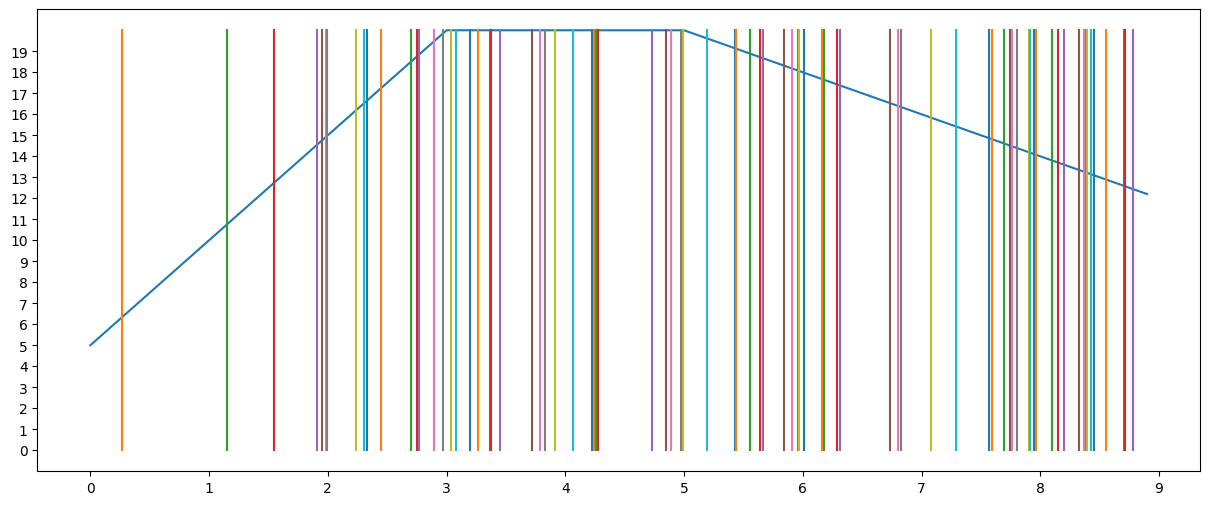

In [6]:
xs = np.arange(0,9,0.1)
ys = [ lam(t) for t in xs ]

plt.plot(xs,ys)

plot_imp(hot_dog)